In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df = df._get_numeric_data()

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [7]:
y_data = df['price']
x_data = df.drop(['price'], axis = 1)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=0)

In [13]:
lr.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
Yhat=lr.predict(x_test[['horsepower']])

In [16]:
import seaborn as sns

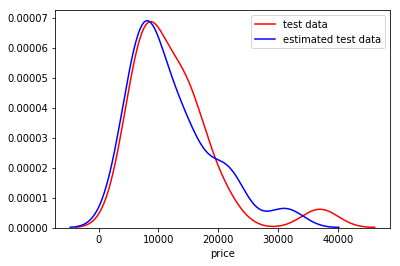

In [18]:
ax1 = sns.distplot(y_test, hist=False, color='r', label='test data')
ax2 = sns.distplot(Yhat, hist=False, color='b', label='estimated test data', ax=ax1)

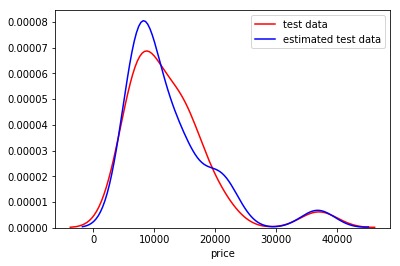

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)

x_train_p = poly.fit_transform(x_train[['horsepower']])
x_test_p = poly.fit_transform(x_test[['horsepower']])

lr.fit(x_train_p, y_train)
Yhat = lr.predict(x_test_p)

ax1 = sns.distplot(y_test, hist=False, color='r', label='test data')
ax2 = sns.distplot(Yhat, hist=False, color='b', label='estimated test data', ax=ax1)

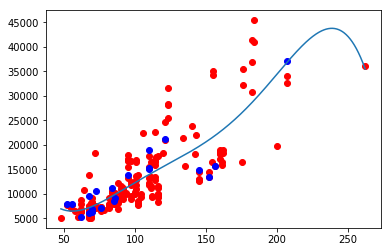

In [50]:
import matplotlib.pyplot as plt

plt.plot(x_train[['horsepower']], y_train, 'ro', label='Training Data')
plt.plot(x_test[['horsepower']], y_test, 'bo', label='Test Data')

x_min = min(x_test[['horsepower']].values.min(), x_train[['horsepower']].values.min())
x_max = max(x_test[['horsepower']].values.max(), x_train[['horsepower']].values.max())

xRange = np.arange(x_min, x_max, 0.1)

plt.plot(xRange, lr.predict(poly.fit_transform(xRange.reshape(-1,1))))

In [51]:
lr.coef_

array([ 0.00000000e+00, -2.23508711e+03,  3.97231928e+01, -3.16053878e-01,
        1.20198739e-03, -1.73111487e-06])

In [52]:
lr.intercept_

51738.2508155795